In [5]:
import cv2
import dlib
import numpy as np
import imutils
import random
from imutils import face_utils
import matplotlib.pyplot as plt
print(cv2.__version__)
%matplotlib inline

def features(img):
    #initialize facial detector
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.resize(gray,(300,300))
#     img = cv2.resize(img,(300,300))
    
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
    rects = detector(gray,1)
    points = []
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(len(rects))
    for (i,rect) in enumerate(rects):
        
        shape = predictor(gray,rect)
        shape = face_utils.shape_to_np(shape)


        (x,y,w,h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#         points.append((x,y))
#         points.append((x+w,y))
#         points.append((x,y+h))
#         points.append((x+w,y+h))

        for (x,y) in shape:
            cv2.circle(img,(x,y),2,(0,0,255),-1)
            points.append((x,y))
            
#         points = np.asarray(list([p.x, p.y] for p in shape.parts()), dtype=np.int)
    return img,points


def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True
 
# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )
 
 
# Draw delaunay triangles
def draw_delaunay(img, delaunay_color ) :


	# Define colors for drawing.
	delaunay_color = (255,255,255)
	points_color = (0, 0, 255)

	img_orig = img.copy()
	 
	img,points = features(img)
	# print(len(points))

	# Rectangle to be used with Subdiv2D
	size = img.shape
	rect = (0, 0, size[1], size[0])
	 
	# Create an instance of Subdiv2D
	subdiv = cv2.Subdiv2D(rect);

	# Insert points into subdiv
	for p in points :
	    subdiv.insert(p)
	

	triangleList = subdiv.getTriangleList();
	size = img.shape
	r = (0, 0, size[1], size[0])
	triangle_points = []
	# print(len(triangleList))

	for t in triangleList :
	    
	    # print(t.shape) 
	    pt1 = (t[0], t[1])
	    pt2 = (t[2], t[3])
	    pt3 = (t[4], t[5])


	     
	    if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
	     
	        cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
	        cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
	        cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

	        triangle_points.append(t)

	# # Draw points
	for p in points :
	    draw_point(img, p, (0,0,255))

	# Show results
# 	cv2.imshow("Delaunay Triangulation",img)
# 	cv2.waitKey(100)

# 	plt.imshow(img)
# 	plt.show()

	return img,triangle_points

3.4.0


1
1
(3, 160)
[[374.34177215]
 [561.49367089]
 [  1.        ]]
[[561.49367089]]
(1, 160)


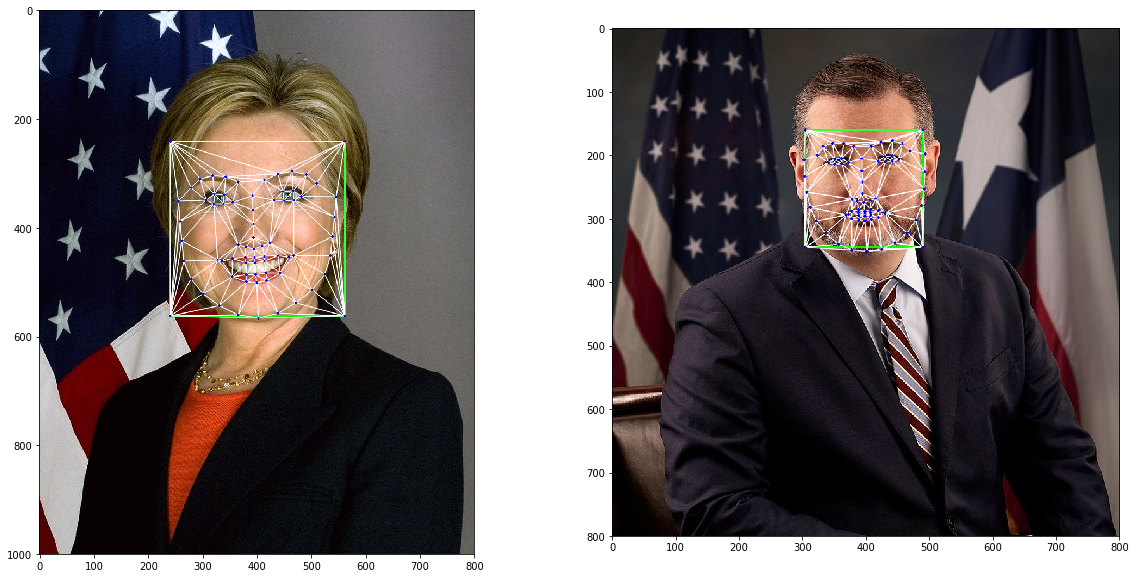

In [9]:
if __name__ == '__main__':
 
    # Read in the image.
    source = cv2.imread("../Images/1.jpg");
    
    target = cv2.imread("../Images/2.jpg");
    
    # plt.rcParams["figure.figsize"] = (10,10)
    # plt.imshow(source)

    # plt.rcParams["figure.figsize"] = (10,10)
    # plt.imshow(target)
 

 
    # Draw delaunay triangles
    source_img,source_points = draw_delaunay( source, (255, 255, 255) );
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.imshow(source_img)
    target_img,target_points = draw_delaunay( target, (255, 255, 255) );
    plt.subplot(122)
    plt.imshow(target_img)

for t,s in zip(target_points,source_points):

    # Extract corners of the unwarped triangle
    ax = t[0]
    bx = t[2]
    cx = t[4]
    ay = t[1]
    by = t[3]
    cy = t[5]

    # Bounding box of the triangle
    xleft = min(ax, bx, cx)
    xright = max(ax, bx, cx)
    ytop = min(ay, by, cy)
    ybottom = max(ay, by, cy)

    barytransform = np.linalg.inv([[ax,bx,cx], [ay,by,cy], [1,1,1]])     

    grid = np.mgrid[xleft:xright, ytop:ybottom].reshape(2,-1)
    grid = np.vstack((grid, np.ones((1, grid.shape[1]))))

    barycoords = np.dot(barytransform, grid)
#     print(len(barycoords[0]))
    barycoords = barycoords[:,np.all(barycoords>=0, axis=0)]
    
    trans = np.matrix([[s[0],s[2],s[4]],[s[1],s[3],s[5]],[1,1,1]])
    pts = np.matmul(trans,barycoords)
    print(pts.shape)
    print(pts[:,1])
    xA = pts[0,:]/pts[2,:]
    yA = pts[1,:]/pts[2,:]
    print(yA[:,1])
    print(xA.shape)
    break
    


In [2]:
def ThinPlateSpline(points, ctrlpoints):

    npnts = len(points)
    print(npnts)
    K = np.zeros((npnts, npnts))
#     for rr in xrange(npnts):
#         for cc in xrange(npnts):
#             K(rr,cc) = np.sum( (points[rr,:] - points[cc,:])**2 )
#             K(cc,rr) = K(rr,cc)
            
ThinPlateSpline(source_points,target_points)
        
#     %calculate kernel function R
#     K = max(K,1e-320); 
#     %K = K.* log(sqrt(K));
#     K = sqrt(K); %
#     % Calculate P matrix
#     P = [ones(npnts,1), points]; %nX4 for 3D
#     % Calculate L matrix
#     L = [ [K, P];[P', zeros(4,4)] ]; %zeros(4,4) for 3D
#     param = pinv(L) * [ctrlpoints; zeros(4,3)]; %zeros(4,3) for 3D
#     %======================================================
#     % Calculate new coordinates (x',y',z') for each points 
#     %====================================================== 
#     pntsNum=size(object,1); 
#     K = zeros(pntsNum, npnts);
#     gx=object(:,1);
#     gy=object(:,2);
#     gz=object(:,3);
#     for nn = 1:npnts
#         K(:,nn) = (gx - points(nn,1)).^2 + (gy - points(nn,2) ).^2 + (gz - points(nn,3) ).^2; % R^2
#     end;
#     K = max(K,1e-320); 
#     K = sqrt(K); %|R| for 3D
#     P = [ones(pntsNum,1), gx, gy, gz];
#     L = [K, P];
#     wobject = L * param;  
#     wobject(:,1)=round(wobject(:,1)*10^3)*10^-3;
#     wobject(:,2)=round(wobject(:,2)*10^3)*10^-3;
#     wobject(:,3)=round(wobject(:,3)*10^3)*10^-3;
                                 
#     return wobject
                             


NameError: name 'source_points' is not defined